In [154]:
import suspect
import shutil
import glob, os
import numpy as np
import pandas as pd
import seaborn as sns
import subprocess
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 7]

In [155]:
#der_dir = '/home/orco/Documents/PTB/MRS/MacroMols_7T/derivatives/LC_Model'
der_dir = '/home/orco/data/MacroMols/MRS/MacroMols_7T/derivatives/LC_Model'

In [156]:
mm_raws_mask = 'sub*/mrs/sub-*_nuc-1H_loc-*_spec-ad-special_TI1-800_TI2-42_avg_ecc_dry.raw'

In [157]:
mm_raws = glob.glob(der_dir + '/' + mm_raws_mask)

In [158]:
mm_raws

['/home/orco/data/MacroMols/MRS/MacroMols_7T/derivatives/LC_Model/sub-703/mrs/sub-703_nuc-1H_loc-wm_spec-ad-special_TI1-800_TI2-42_avg_ecc_dry.raw',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/derivatives/LC_Model/sub-703/mrs/sub-703_nuc-1H_loc-pcc_spec-ad-special_TI1-800_TI2-42_avg_ecc_dry.raw',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/derivatives/LC_Model/sub-706/mrs/sub-706_nuc-1H_loc-wm_spec-ad-special_TI1-800_TI2-42_avg_ecc_dry.raw',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/derivatives/LC_Model/sub-706/mrs/sub-706_nuc-1H_loc-pcc_spec-ad-special_TI1-800_TI2-42_avg_ecc_dry.raw',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/derivatives/LC_Model/sub-706/mrs/sub-706_nuc-1H_loc-acc_spec-ad-special_TI1-800_TI2-42_avg_ecc_dry.raw',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/derivatives/LC_Model/sub-702/mrs/sub-702_nuc-1H_loc-pcc_spec-ad-special_TI1-800_TI2-42_avg_ecc_dry.raw',
 '/home/orco/data/MacroMols/MRS/MacroMols_7T/derivatives/LC_Model/sub-702/mrs/sub-702_nuc-1H_loc-wm_sp

In [159]:
i = mm_raws[0]


In [160]:
w = i.replace('spec-ad-special_TI1-800_TI2-42_avg_ecc_dry.raw', 'spec-lr-special_water_wOVSavg.raw')

In [161]:
#control file 01.03

# MM3.jpg
control = '''
$LCMODL
title='{sub}_{roi}'
atth2o= 0.8111
key = 210387309
deltat= 1.250e-04
doecc= F
dows= F
hzpppm= 2.9721e+02
neach= 999
nunfil= 4096
PPMREF(1,2) = 2.09
SDDEGZ = 22
SDDEGP = 0
shifmn = -0.05
shifmx = 0.05
FIXSHF = T
ppmend= 0.2
ppmst= 4.2
wconc= 43432
dkntmn= 0.25
echot= 9
nsimul= 19
chsimu(19) = '-PCr @ 3.05 +- .01 FWHM= -.04 < 0.06 +- .005 AMP=-3.'
chsimu(18) = 'MM4.04 @ 4.05 +- .005 FWHM=0.00 < 0.08 +- .005 AMP=1'
chsimu(17) = 'CrCH2 @ 3.932 +- .001 FWHM= 0.01 < 0.03 +- .005 AMP=2.'
chsimu(16) = 'MM3.90 @ 3.92 +- .005 FWHM=0.08 < 0.10 +- .005 AMP=1'
chsimu(15) = 'MM3.79 @ 3.79 +- .01 FWHM=0.02 < 0.08 +- .001 AMP=1'
chsimu(14) = 'MM3.71 @ 3.71 +- .005 FWHM=0.04 < 0.10 +- .005 AMP=1'
chsimu(13) = 'MM3.59 @ 3.59 +- .005 FWHM=0.04 < 0.07 +- .005 AMP=1'
chsimu(12) = 'MM3.21 @ 3.21 +- .005 FWHM= 0.14 < 0.16 +- .005 AMP=1'
chsimu(11) = '-Cho @ 3.18 +- .005 FWHM= -.06 < 0.16 +- .005 AMP=-3.'
chsimu(10) = 'MM3.00 @ 3.00 +- .005 FWHM= 0.10 < 0.12 +- .005 AMP=1.'
chsimu(9) = 'MM2.74 @ 2.75 +- .01 FWHM= 0.10 < 0.13 +- .005 AMP=1.'
chsimu(8) = 'MM2.54 @ 2.59 +- .01 FWHM= 0.11 < 0.14 +- .005 AMP=1.'
chsimu(7) = 'MM2.27 @ 2.27  +- .005 FWHM= 0.09 < 0.15 +- .01 AMP=1.'
chsimu(6) = 'MM2.05 @ 2.05 +- .005 FWHM= 0.15 < 0.28 +- .02 AMP=1.'
chsimu(5) = 'MM1.70 @ 1.70 +- .005 FWHM= 0.17 < 0.19 +- .01 AMP= 1.'
chsimu(4) = 'MM1.43 @ 1.43 +- .005 FWHM= 0.08 < 0.11 +- .01 AMP= 1.'
chsimu(3) = 'MM1.22 @ 1.22 +- .05 FWHM= 0.07 < 0.09 +- .005 AMP= 1.'
chsimu(2) = 'MM0.94 @ 0.94 +- .005 FWHM= 0.08 < 0.11 +- .01 AMP= 1.'
chsimu(1) = 'MM0.7 @ 0.70 +- .01 FWHM=0.0 < 0.06 +- .01 AMP= 1.'
NRATIO = 0
nomit= 11
chomit= 'Gua' 'Ser' 'Lip13a' 'Lip13b' 'Lip09' 'MM09' 'Lip20' 'MM20' 'MM12' 'MM14' 'MM17'
FILBAS='/home/orco/data/MacroMols/MRS/MacroMols_7T/derivatives/LCModel_basis/7T_SE_TE9_NAAG-CH3_NAA_Glx.basis'
FILRAW='{filename}.raw'
LTABLE=7, FILTAB='{filename}/{filename}.table'
FILPS='{filename}.ps'
LCSV=11, FILCSV='{filename}/{filename}.csv'
LCOORD=9, FILCOO='{filename}/{filename}.coord'
LPRINT=6, FILPRI='{filename}/{filename}.print'
LCORAW=10, FILCOR='{filename}/{filename}.coraw'
filh2o='{water}'
$END
'''

# MM3.jpg
control = '''
$LCMODL
title='{sub}_{roi}'
atth2o= 0.8111
key = 210387309
deltat= 1.250e-04
doecc= F
dows= T
hzpppm= 2.9721e+02
neach= 999
nunfil= 4096
PPMREF(1,2) = 2.09
SDDEGZ = 22
SDDEGP = 0
shifmn = -0.05
shifmx = 0.05
FIXSHF = T
ppmend= 0.2
ppmst= 4.2
wconc= 43432
dkntmn= 0.25
echot= 9
nsimul= 19
chsimu(19) = '-PCr @ 3.05 +- .01 FWHM= -.04 < 0.06 +- .005 AMP=-3.'
chsimu(18) = 'MM4.04 @ 4.05 +- .05 FWHM=0.001 < 0.08 +- .005 AMP=1'
chsimu(17) = 'CrCH2 @ 3.932 +- .001 FWHM= 0.01 < 0.03 +- .005 AMP=2.'
chsimu(16) = 'MM3.90 @ 3.92 +- .02 FWHM=0.08 < 0.10 +- .005 AMP=1'
chsimu(15) = 'MM3.79 @ 3.79 +- .02 FWHM=0.02 < 0.08 +- .001 AMP=1'
chsimu(14) = 'MM3.71 @ 3.71 +- .02 FWHM=0.04 < 0.10 +- .005 AMP=1'
chsimu(13) = 'MM3.59 @ 3.59 +- .02 FWHM=0.04 < 0.07 +- .005 AMP=1'
chsimu(12) = 'MM3.21 @ 3.21 +- .005 FWHM= 0.14 < 0.16 +- .005 AMP=1'
chsimu(11) = '-Cho @ 3.18 +- .005 FWHM= -.06 < 0.16 +- .005 AMP=-3.'
chsimu(10) = 'MM3.00 @ 3.00 +- .005 FWHM= 0.10 < 0.12 +- .005 AMP=1.'
chsimu(9) = 'MM2.74 @ 2.75 +- .01 FWHM= 0.10 < 0.13 +- .005 AMP=1.'
chsimu(8) = 'MM2.54 @ 2.59 +- .01 FWHM= 0.11 < 0.14 +- .005 AMP=1.'
chsimu(7) = 'MM2.27 @ 2.27  +- .005 FWHM= 0.09 < 0.15 +- .01 AMP=1.'
chsimu(6) = 'MM2.05 @ 2.05 +- .005 FWHM= 0.15 < 0.28 +- .02 AMP=1.'
chsimu(5) = 'MM1.70 @ 1.70 +- .005 FWHM= 0.17 < 0.19 +- .01 AMP= 1.'
chsimu(4) = 'MM1.43 @ 1.43 +- .005 FWHM= 0.08 < 0.11 +- .01 AMP= 1.'
chsimu(3) = 'MM1.22 @ 1.22 +- .05 FWHM= 0.07 < 0.09 +- .005 AMP= 1.'
chsimu(2) = 'MM0.94 @ 0.94 +- .005 FWHM= 0.08 < 0.11 +- .01 AMP= 1.'
chsimu(1) = 'MM0.70 @ 0.70 +- .01 FWHM=0.001 < 0.06 +- .01 AMP= 1.'
NRATIO = 0
nomit= 11
chomit= 'Gua' 'Ser' 'Lip13a' 'Lip13b' 'Lip09' 'MM09' 'Lip20' 'MM20' 'MM12' 'MM14' 'MM17'
FILBAS='/home/orco/data/MacroMols/MRS/MacroMols_7T/derivatives/LCModel_basis/7T_SE_TE9_NAAG-CH3_NAA_Glx.basis'
FILRAW='{filename}.raw'
LTABLE=7, FILTAB='{filename}/{filename}.table'
FILPS='{filename}.ps'
LCSV=11, FILCSV='{filename}/{filename}.csv'
LCOORD=9, FILCOO='{filename}/{filename}.coord'
LPRINT=6, FILPRI='{filename}/{filename}.print'
LCORAW=10, FILCOR='{filename}/{filename}.coraw'
filh2o='{water}'
$END
'''

In [885]:
control = '''
$LCMODL
title='{sub}_{roi}_Metabolite_Nulled'
atth2o= 0.8111
key = 210387309
deltat= 1.250e-04
doecc= F
dows= T
hzpppm= 2.9721e+02
neach= 999
nunfil= 4096
PPMREF(1,2) = 2.09
SDDEGZ = 1
SDDEGP = 0.
shifmn = -0.05
shifmx = 0.05
FIXSHF = T
ppmend= 0.75
ppmst= 4.1
wconc= 43432
dkntmn= 99
echot= 9
nsimul= 18
chsimu(18) = '-PCr @ 3.05 +- .01 FWHM= -.04 < -0.06 +- .005 AMP=-3.'
chsimu(17) = 'MM4.04 @ 4.05 +- .05 FWHM=0.001 < 0.08 +- .005 AMP=1'
chsimu(16) = 'CrCH2 @ 3.932 +- .001 FWHM= 0.01 < 0.03 +- .005 AMP=2.'
chsimu(15) = 'MM3.90 @ 3.92 +- .02 FWHM=0.08 < 0.10 +- .005 AMP=1'
chsimu(14) = 'MM3.79 @ 3.79 +- .01 FWHM=0.02 < 0.08 +- .001 AMP=1'
chsimu(13) = 'MM3.71 @ 3.71 +- .02 FWHM=0.04 < 0.10 +- .005 AMP=1'
chsimu(12) = 'MM3.59 @ 3.59 +- .02 FWHM=0.04 < 0.07 +- .005 AMP=1'
chsimu(11) = 'MM3.21 @ 3.21 +- .005 FWHM= 0.14 < 0.16 +- .01 AMP=1'
chsimu(10) = '-Cho @ 3.18 +- .005 FWHM= -.06 < -0.16 +- .005 AMP=-3.'
chsimu(9) = 'MM3.00 @ 3.00 +- .005 FWHM= 0.10 < 0.12 +- .01 AMP=1.'
chsimu(8) = 'MM2.74 @ 2.75 +- .01 FWHM= 0.10 < 0.13 +- .005 AMP=1.'
chsimu(7) = 'MM2.54 @ 2.59 +- .01 FWHM= 0.11 < 0.14 +- .005 AMP=1.'
chsimu(6) = 'MM2.27 @ 2.27  +- .005 FWHM= 0.09 < 0.15 +- .01 AMP=1.'
chsimu(5) = 'MM2.05 @ 2.05 +- .005 FWHM= 0.15 < 0.28 +- .02 AMP=1.'
chsimu(4) = 'MM1.70 @ 1.70 +- .01 FWHM= 0.17 < 0.19 +- .01 AMP= 1.'
chsimu(3) = 'MM1.43 @ 1.43 +- .01 FWHM= 0.08 < 0.11 +- .01 AMP= 1.'
chsimu(2) = 'MM1.22 @ 1.22 +- .01 FWHM= 0.07 < 0.09 +- .005 AMP= 1.'
chsimu(1) = 'MM0.94 @ 0.94 +- .005 FWHM= 0.08 < 0.11 +- .01 AMP= 1.'
NRATIO = 0
nomit= 11
chomit= 'Gua' 'Ser' 'Lip13a' 'Lip13b' 'Lip09' 'MM09' 'Lip20' 'MM20' 'MM12' 'MM14' 'MM17'
FILBAS='/home/orco/data/MacroMols/MRS/MacroMols_7T/derivatives/LCModel_basis/7T_SE_TE9_NAAG-CH3_NAA_Glx.basis'
FILRAW='{filename}.raw'
LTABLE=7, FILTAB='{filename}/{filename}.table'
FILPS='{filename}.ps'
LCSV=11, FILCSV='{filename}/{filename}.csv'
LCOORD=9, FILCOO='{filename}/{filename}.coord'
LPRINT=6, FILPRI='{filename}/{filename}.print'
LCORAW=10, FILCOR='{filename}/{filename}.coraw'
filh2o='{water}'
$END
'''

In [894]:
for i in mm_raws:
    w = i.replace('spec-ad-special_TI1-800_TI2-42_avg_ecc_dry.raw', 'spec-lr-special_water_wOVSavg.raw')
    filename=os.path.basename(i).strip('.raw')
    sub=filename.split('_')[0]
    roi=filename.split('_')[2]
    control_file_name = i.replace('.raw', '.control')
    dirname = os.path.dirname(i)
    os.makedirs(os.path.join(dirname, filename), exist_ok=True)
    with open (control_file_name, 'w') as ctrlf:
        ctrlf.write(control.format(filename=filename,
                                  water=w,
                                  sub=sub,
                                  roi=roi))
    

In [895]:
for i in mm_raws:
    dirname = os.path.dirname(i)
    os.chdir(dirname)
    print(os.getcwd())
    proc = subprocess.run('/home/orco/.lcmodel/bin/lcmodel < {filename}'.format(filename=os.path.basename(i).replace('.raw', '.control')), shell=True, check=True, capture_output=True)
    print(proc)

/home/orco/data/MacroMols/MRS/MacroMols_7T/derivatives/LC_Model/sub-703/mrs
CompletedProcess(args='/home/orco/.lcmodel/bin/lcmodel < sub-703_nuc-1H_loc-wm_spec-ad-special_TI1-800_TI2-42_avg_ecc_dry.control', returncode=0, stdout=b'', stderr=b'')
/home/orco/data/MacroMols/MRS/MacroMols_7T/derivatives/LC_Model/sub-703/mrs
CompletedProcess(args='/home/orco/.lcmodel/bin/lcmodel < sub-703_nuc-1H_loc-pcc_spec-ad-special_TI1-800_TI2-42_avg_ecc_dry.control', returncode=0, stdout=b'', stderr=b'')
/home/orco/data/MacroMols/MRS/MacroMols_7T/derivatives/LC_Model/sub-706/mrs
CompletedProcess(args='/home/orco/.lcmodel/bin/lcmodel < sub-706_nuc-1H_loc-wm_spec-ad-special_TI1-800_TI2-42_avg_ecc_dry.control', returncode=0, stdout=b'', stderr=b'')
/home/orco/data/MacroMols/MRS/MacroMols_7T/derivatives/LC_Model/sub-706/mrs
CompletedProcess(args='/home/orco/.lcmodel/bin/lcmodel < sub-706_nuc-1H_loc-pcc_spec-ad-special_TI1-800_TI2-42_avg_ecc_dry.control', returncode=0, stdout=b'', stderr=b'')
/home/orco/dat

In [897]:
i = mm_raws[0]
filename=os.path.basename(i).strip('.raw')
control_file_name = i.replace('.raw', '.control')
dirname = os.path.dirname(i)
coord = os.path.join(dirname, filename, filename +'.coord')
loc = filename.split('_')[2].split('-')[-1]
sub = filename.split('_')[0].split('-')[-1]

In [898]:
c = suspect.io.lcmodel.read_coord(coord)['metabolite_fits']

In [899]:
d = dict()
for i in mm_raws:
    filename=os.path.basename(i).strip('.raw')
    control_file_name = i.replace('.raw', '.control')
    dirname = os.path.dirname(i)
    coord = os.path.join(dirname, filename, filename +'.coord')
    loc = filename.split('_')[2].split('-')[-1]
    sub = filename.split('_')[0].split('-')[-1]
    d['{}_{}'.format(sub,loc)] = suspect.io.lcmodel.read_coord(coord)['metabolite_fits']

In [900]:
dd = dict()
for i in d:
    dd[i] = dict()
    for j in d[i]:
        dd[i][j] = d[i][j]['concentration']

In [901]:
conc_df = pd.DataFrame.from_dict(dd).transpose()

In [902]:
conc_df = conc_df[[i for i in conc_df.columns if i.startswith('MM')]]

In [903]:
conc_df['sub_id'] = conc_df.index

In [904]:
conc_df['ROI'] = conc_df.sub_id.apply(lambda x: x.split('_')[-1]) 
conc_df['sub_id'] = conc_df.sub_id.apply(lambda x: x.split('_')[0]) 

In [905]:
conc_df

,MM0.94,MM1.22,MM1.43,MM1.70,MM2.05,MM2.27,MM2.54,MM2.74,MM3.00,MM3.21,MM3.59,MM3.71,MM3.79,MM3.90,MM4.04,sub_id,ROI
703_wm,0.00684,0.00323,0.00712,0.01450,0.0255,0.01300,0.00834,0.00777,0.00969,0.01120,0.00354,0.00647,0.00380,0.00604,0.005670,703,wm
703_pcc,0.00589,0.00363,0.01440,0.01080,0.0505,0.01060,0.00775,0.00598,0.00934,0.00808,0.00263,0.00650,0.00395,0.00619,0.008740,703,pcc
706_wm,0.00662,0.00229,0.00925,0.00734,0.0332,0.01610,0.00695,0.00614,0.00883,0.00606,0.00177,0.00366,0.00135,0.00214,0.000115,706,wm
706_pcc,0.01000,0.00485,0.00987,0.01870,0.0521,0.01510,0.00726,0.00659,0.01430,0.01100,0.00250,0.00450,0.00203,0.00454,0.001400,706,pcc
706_acc,0.00954,0.00534,0.01290,0.02360,0.0606,0.01890,0.00771,0.00769,0.02430,0.01970,0.00382,0.00577,0.00373,0.00591,0.003090,706,acc
702_pcc,0.00598,0.00377,0.01030,0.01290,0.0563,0.00973,0.00533,0.00456,0.00868,0.00804,0.00287,0.00564,0.00384,0.00894,0.008030,702,pcc
702_wm,0.00617,0.00217,0.00892,0.01440,0.0387,0.00945,0.00629,0.00665,0.00905,0.01120,0.00325,0.00669,0.00376,0.00668,0.008910,702,wm
702_acc,0.00700,0.00362,0.01800,0.01510,0.0443,0.01060,0.00870,0.00843,0.02060,0.02500,0.00324,0.00421,0.00364,0.00406,0.010300,702,acc
701_pcc,0.00932,0.00456,0.01340,0.01690,0.0684,0.01020,0.00594,0.00614,0.01570,0.02050,0.00397,0.00698,0.00479,0.01040,0.010100,701,pcc
704_pcc,0.00548,0.00295,0.00815,0.01170,0.0318,0.01210,0.00707,0.00584,0.00676,0.00852,0.00195,0.00325,0.00295,0.00488,0.006870,704,pcc


In [906]:
#len(conc_df['MM0.7'])

In [907]:
from scipy.stats import normaltest, shapiro
for i in [i for i in conc_df.columns if 'MM' in i]:
    print(i)
    print(normaltest(conc_df[i].values))
    print(shapiro(conc_df[i].values))

MM0.94
NormaltestResult(statistic=2.28591373250351, pvalue=0.318874756465181)
ShapiroResult(statistic=0.8662562370300293, pvalue=0.046622585505247116)
MM1.22
NormaltestResult(statistic=0.39659366622748293, pvalue=0.8201263763376805)
ShapiroResult(statistic=0.9507067203521729, pvalue=0.6090371608734131)
MM1.43
NormaltestResult(statistic=3.0644796931504903, pvalue=0.2160512034081061)
ShapiroResult(statistic=0.9380112886428833, pvalue=0.43167179822921753)
MM1.70
NormaltestResult(statistic=0.12172869448796445, pvalue=0.9409508736981619)
ShapiroResult(statistic=0.9849103689193726, pvalue=0.9952815771102905)
MM2.05
NormaltestResult(statistic=0.7138319830708135, pvalue=0.6998312870170744)
ShapiroResult(statistic=0.9658378958702087, pvalue=0.8401585221290588)
MM2.27
NormaltestResult(statistic=2.4943277881636354, pvalue=0.2873185081504322)
ShapiroResult(statistic=0.8880394101142883, pvalue=0.09171660244464874)
MM2.54
NormaltestResult(statistic=0.009897189253357936, pvalue=0.9950636294953232)
Sh

/home/orco/anaconda3/envs/mrs/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [908]:
#conc_df = conc_df.drop('703_wm')

In [909]:
len(conc_df)

13

In [910]:
#conc_df.to_csv('MM_concentrations.csv')

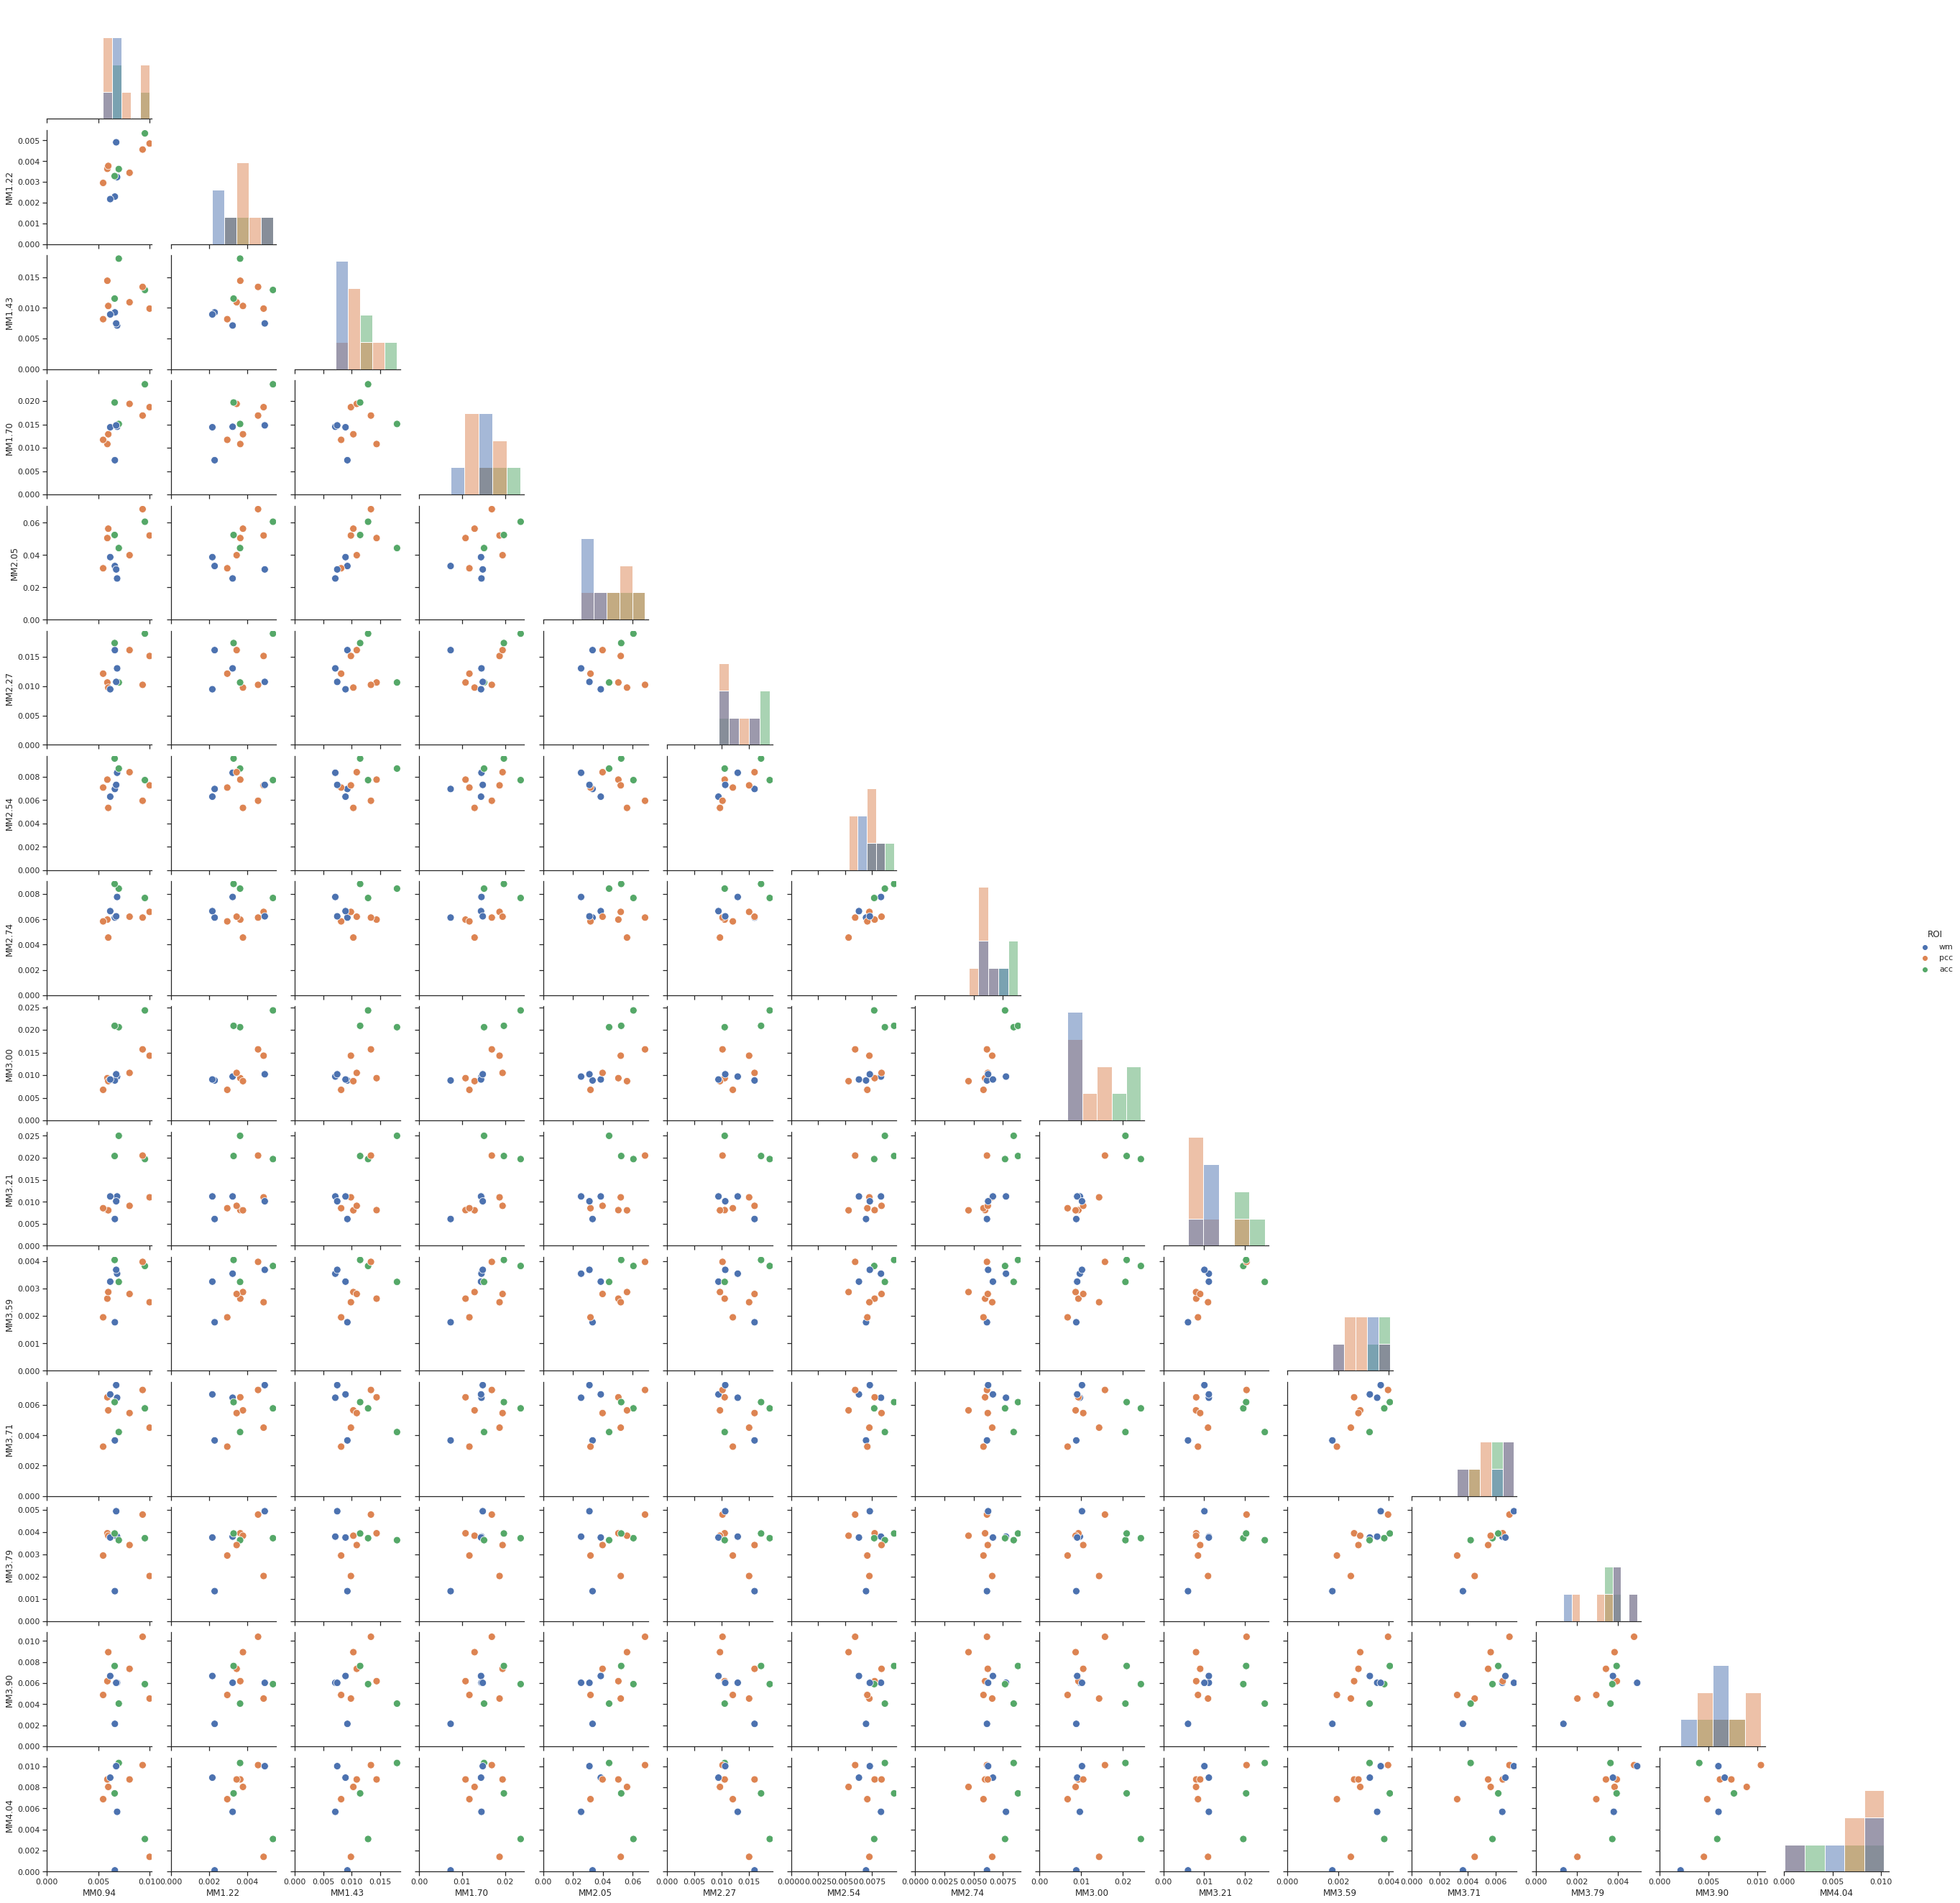

In [911]:
sns.set_theme(style="ticks")
g = sns.pairplot(conc_df,
             hue='ROI',
             kind='scatter',
             diag_kind='hist',
             corner=True, 
             plot_kws={"s": 100})
g.set(ylim=(0, None),
     xlim=(0, None))

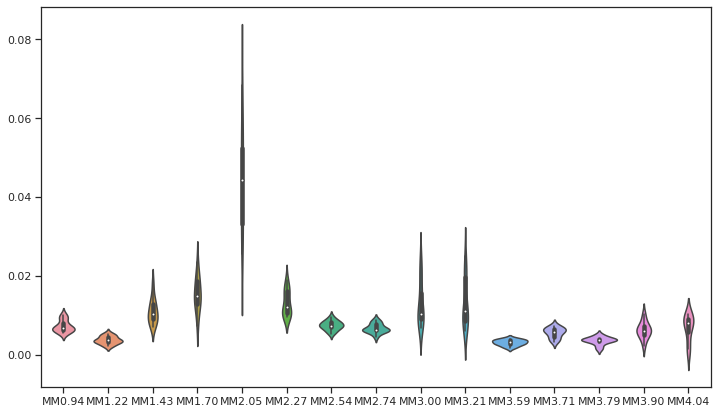

In [912]:
ax = sns.violinplot(data=conc_df)

In [913]:
conc_df.corr()

,MM0.94,MM1.22,MM1.43,MM1.70,MM2.05,MM2.27,MM2.54,MM2.74,MM3.00,MM3.21,MM3.59,MM3.71,MM3.79,MM3.90,MM4.04
MM0.94,1.000000,0.694953,0.217533,0.701474,0.541988,0.444986,0.011916,0.192059,0.562205,0.398566,0.308616,0.077161,-0.060828,0.132425,-0.327392
MM1.22,0.694953,1.000000,0.223892,0.613954,0.531606,0.161414,-0.023702,0.034353,0.505418,0.350207,0.451375,0.294377,0.368703,0.260303,0.000045
MM1.43,0.217533,0.223892,1.000000,0.209316,0.591338,-0.049850,0.246994,0.320146,0.619513,0.674741,0.207606,-0.063989,0.171906,0.078033,0.300199
MM1.70,0.701474,0.613954,0.209316,1.000000,0.479100,0.509025,0.355133,0.481537,0.734776,0.582098,0.650093,0.287460,0.306751,0.366884,0.027092
MM2.05,0.541988,0.531606,0.591338,0.479100,1.000000,0.076905,-0.231590,-0.032747,0.574456,0.501090,0.382391,0.222409,0.252019,0.565077,0.076640
MM2.27,0.444986,0.161414,-0.049850,0.509025,0.076905,1.000000,0.524861,0.429729,0.480953,0.120740,0.009413,-0.271502,-0.437920,-0.286955,-0.662124
MM2.54,0.011916,-0.023702,0.246994,0.355133,-0.231590,0.524861,1.000000,0.806856,0.464923,0.381484,0.235293,-0.064357,-0.008733,-0.288254,-0.000806
MM2.74,0.192059,0.034353,0.320146,0.481537,-0.032747,0.429729,0.806856,1.000000,0.728042,0.722554,0.521819,0.047291,0.083179,-0.210010,-0.034826
MM3.00,0.562205,0.505418,0.619513,0.734776,0.574456,0.480953,0.464923,0.728042,1.000000,0.887512,0.611144,0.066840,0.182045,0.072543,-0.051941
MM3.21,0.398566,0.350207,0.674741,0.582098,0.501090,0.120740,0.381484,0.722554,0.887512,1.000000,0.689307,0.133080,0.384010,0.214787,0.278575


In [914]:
corr = conc_df.corr(method='spearman')

In [915]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
#corr.values[corr.values > 0.7]

/tmp/ipykernel_8213/1285119621.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

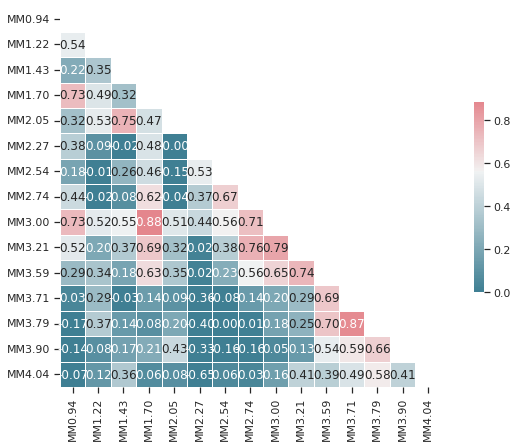

In [921]:
# Set up the matplotlib figure
#plt.title('Matrix of Pearsons\' coefficients for the integrals of MM peaks')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0.56, vmin=0,
            square=True, annot=True, fmt='1.2f', linewidths=.5, cbar_kws={"shrink": 0.5})

In [922]:
# CRLB

In [923]:
ds = dict()
for i in d:
    ds[i] = dict()
    for j in d[i]:
        ds[i][j] = d[i][j]['sd']

In [924]:
crlb_df = pd.DataFrame.from_dict(ds).transpose()

In [925]:
crlb_df = crlb_df[[i for i in crlb_df.columns if 'MM' in i]]

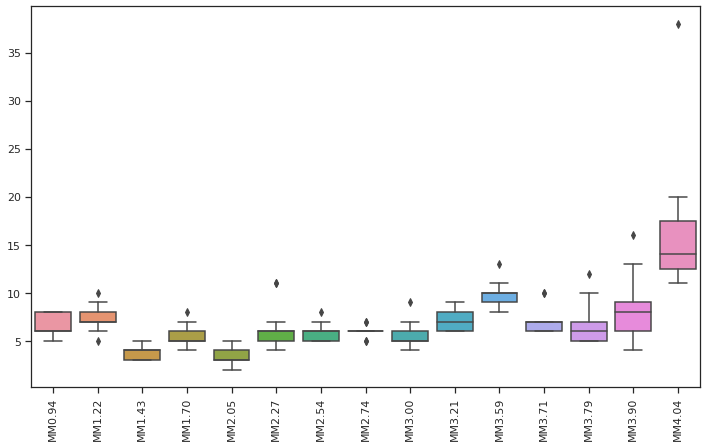

In [926]:
ax = sns.boxplot(data=crlb_df[crlb_df < 50])
ax.tick_params(axis='x', rotation=90)

In [927]:
from sklearn.linear_model import LinearRegression

def reg_coef(x,y):
    X = [np.array([i]) for i in x]
    model = LinearRegression()
    model.fit(X,y)
    return model.coef_

In [928]:
crlb_df

,MM0.94,MM1.22,MM1.43,MM1.70,MM2.05,MM2.27,MM2.54,MM2.74,MM3.00,MM3.21,MM3.59,MM3.71,MM3.79,MM3.90,MM4.04
703_wm,8,8,5,7,5,5,5,6,5,6,10,7,7,9,20
703_pcc,7,8,3,5,3,6,5,6,5,7,10,6,5,6,18
706_wm,6,7,3,8,5,5,5,5,5,7,11,7,12,13,591
706_pcc,5,5,3,4,2,4,5,5,4,6,9,7,10,8,62
706_acc,5,6,4,4,3,6,7,6,6,9,10,7,7,9,38
702_pcc,6,6,3,4,2,6,6,6,5,6,8,6,5,4,11
702_wm,8,10,4,6,4,7,6,6,5,6,9,6,6,8,13
702_acc,8,9,4,6,4,11,7,7,9,9,11,10,7,16,14
701_pcc,6,7,4,5,2,11,8,7,7,8,9,7,5,5,13
704_pcc,8,8,4,5,3,6,6,6,7,9,13,10,8,8,16


In [929]:
# Slopes

In [930]:
slopes_df = conc_df.corr(method=reg_coef)

In [931]:
diagonal = mask.copy()

In [932]:
mask = (corr < 0.56) | (diagonal)

<AxesSubplot:>

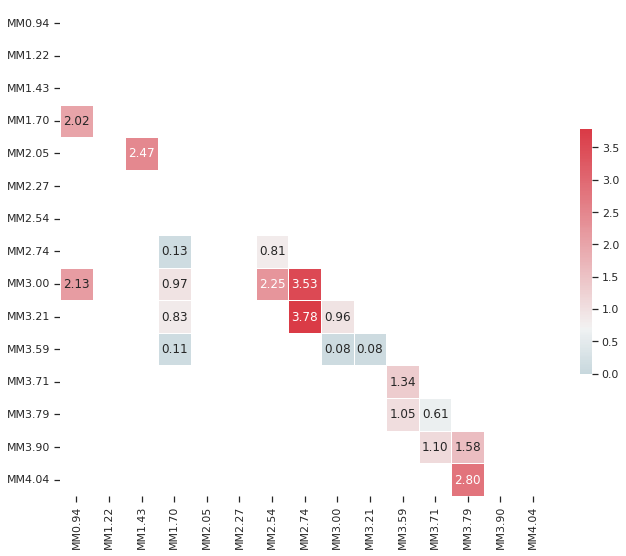

In [934]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
#plt.title('Matrix of Pearsons\' coefficients for the integrals of MM peaks')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(slopes_df, mask=mask, cmap=cmap, center=0.70, vmin=0,
            square=True, annot=True, fmt='1.2f', linewidths=.5, cbar_kws={"shrink": 0.5})

In [935]:
#Ref: https://stackoverflow.com/questions/52741236/how-to-calculate-p-values-for-pairwise-correlation-of-columns-in-pandas
from scipy.stats import pearsonr, spearmanr

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

In [936]:
pvalues_df = conc_df.corr(method=pearsonr_pval)

<AxesSubplot:>

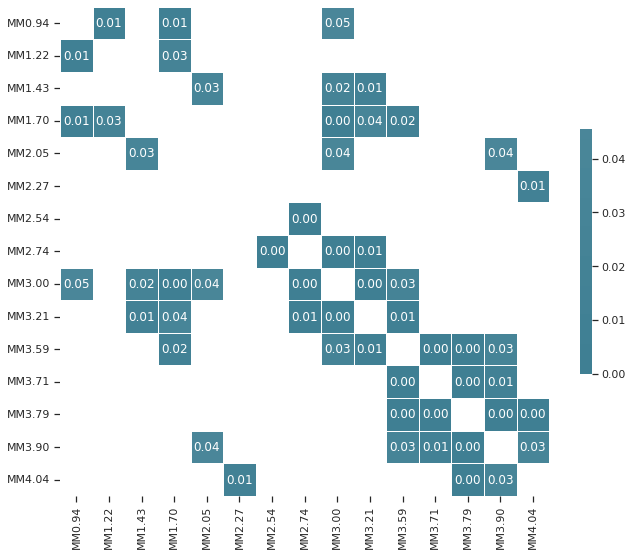

In [937]:
mask = (pvalues_df > 0.05) #| (diagonal)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
#plt.title('Matrix of Pearsons\' coefficients for the integrals of MM peaks')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(pvalues_df, mask=mask, cmap=cmap, center=0.70, vmin=0,
            square=True, annot=True, fmt='1.2f', linewidths=.5, cbar_kws={"shrink": 0.5})

<AxesSubplot:>

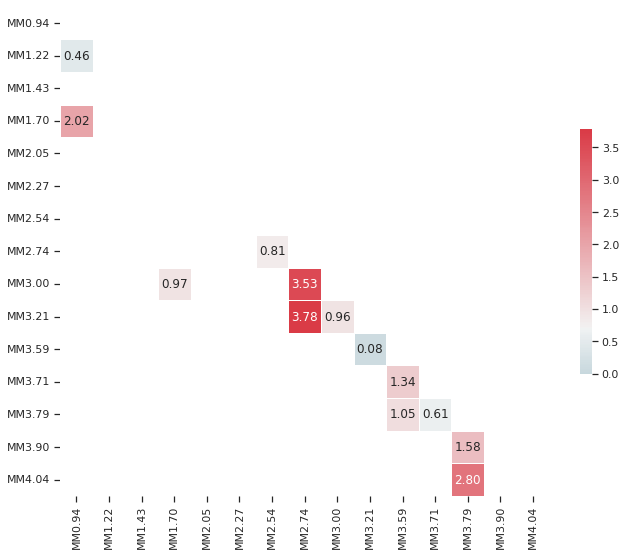

In [941]:
mask = (pvalues_df >= 0.01) | (diagonal)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
#plt.title('Matrix of Pearsons\' coefficients for the integrals of MM peaks')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(slopes_df, mask=mask, cmap=cmap, center=0.70, vmin=0,
            square=True, annot=True, fmt='1.2f', linewidths=.5, cbar_kws={"shrink": 0.5})

In [939]:
pvalues_df

,MM0.94,MM1.22,MM1.43,MM1.70,MM2.05,MM2.27,MM2.54,MM2.74,MM3.00,MM3.21,MM3.59,MM3.71,MM3.79,MM3.90,MM4.04
MM0.94,1.000000,0.008373,0.475278,0.007540,0.055704,0.127590,0.969182,0.529612,0.045514,0.177349,0.304922,0.802163,0.843514,0.666276,0.274860
MM1.22,0.008373,1.000000,0.462140,0.025604,0.061523,0.598318,0.938738,0.911290,0.078086,0.240764,0.121564,0.328910,0.215090,0.390385,0.999883
MM1.43,0.475278,0.462140,1.000000,0.492511,0.033290,0.871522,0.415910,0.286249,0.023936,0.011406,0.496134,0.835479,0.574407,0.799968,0.318979
MM1.70,0.007540,0.025604,0.492511,1.000000,0.097625,0.075639,0.233754,0.095688,0.004223,0.036870,0.016153,0.340929,0.308006,0.217537,0.929992
MM2.05,0.055704,0.061523,0.033290,0.097625,1.000000,0.802809,0.446469,0.915423,0.040035,0.081094,0.197226,0.465187,0.406176,0.044184,0.803477
MM2.27,0.127590,0.598318,0.871522,0.075639,0.802809,1.000000,0.065526,0.142773,0.096150,0.694385,0.975653,0.369557,0.134481,0.341816,0.013681
MM2.54,0.969182,0.938738,0.415910,0.233754,0.446469,0.065526,1.000000,0.000858,0.109423,0.198379,0.439025,0.834545,0.977411,0.339537,0.997915
MM2.74,0.529612,0.911290,0.286249,0.095688,0.915423,0.142773,0.000858,1.000000,0.004779,0.005272,0.067390,0.878073,0.787042,0.491046,0.910072
MM3.00,0.045514,0.078086,0.023936,0.004223,0.040035,0.096150,0.109423,0.004779,1.000000,0.000052,0.026480,0.828245,0.551680,0.813810,0.866175
MM3.21,0.177349,0.240764,0.011406,0.036870,0.081094,0.694385,0.198379,0.005272,0.000052,1.000000,0.009150,0.664713,0.195175,0.481004,0.356716
